In [1]:
import numpy as np
data = np.genfromtxt('../data/ratings.dat', delimiter = "::").astype('int64')
print(data)
data

[[        1      1193         5 978300760]
 [        1       661         3 978302109]
 [        1       914         3 978301968]
 ...
 [     6040       562         5 956704746]
 [     6040      1096         4 956715648]
 [     6040      1097         4 956715569]]


array([[        1,      1193,         5, 978300760],
       [        1,       661,         3, 978302109],
       [        1,       914,         3, 978301968],
       ...,
       [     6040,       562,         5, 956704746],
       [     6040,      1096,         4, 956715648],
       [     6040,      1097,         4, 956715569]], dtype=int64)

In [2]:
print("배열의 차원 :",data.ndim)
print("배열의 크기 :",data.shape)
print("배열의 개수 :",data.size)

배열의 차원 : 2
배열의 크기 : (1000209, 4)
배열의 개수 : 4000836


In [3]:
rating_all_mean = data[:,2].mean()
print(rating_all_mean)

3.581564453029317


In [4]:
user_id = np.unique(data[:,0])
print(user_id)
print(user_id.shape)

[   1    2    3 ... 6038 6039 6040]
(6040,)


In [5]:
data[:,0]

array([   1,    1,    1, ..., 6040, 6040, 6040], dtype=int64)

In [6]:
data[:,0] == 1

array([ True,  True,  True, ..., False, False, False])

In [7]:
mean_list = [] 
for i in user_id:
    data_mean = data[data[:, 0] == i][:, 2].mean()
    mean_list.append([int(i), data_mean])
mean_array = np.array(mean_list)

In [8]:
mean_array
print(mean_array)

[[1.00000000e+00 4.18867925e+00]
 [2.00000000e+00 3.71317829e+00]
 [3.00000000e+00 3.90196078e+00]
 ...
 [6.03800000e+03 3.80000000e+00]
 [6.03900000e+03 3.87804878e+00]
 [6.04000000e+03 3.57771261e+00]]


In [9]:
mean4_over = mean_array[mean_array[:, 1] >=4]
print(mean4_over)

[[1.00000000e+00 4.18867925e+00]
 [4.00000000e+00 4.19047619e+00]
 [7.00000000e+00 4.32258065e+00]
 ...
 [6.02700000e+03 4.25000000e+00]
 [6.03200000e+03 4.13461538e+00]
 [6.03400000e+03 4.09523810e+00]]


In [10]:
np.savetxt('user_rating.csv', mean_array, delimiter=',', fmt = '%.3f')

In [12]:
import pandas as pd
columns = ['ID', 'Value']
df = pd.DataFrame(mean4_over, columns=columns)
print(df)

          ID     Value
0        1.0  4.188679
1        4.0  4.190476
2        7.0  4.322581
3       10.0  4.114713
4       17.0  4.075829
...      ...       ...
1539  6020.0  4.395349
1540  6024.0  4.126316
1541  6027.0  4.250000
1542  6032.0  4.134615
1543  6034.0  4.095238

[1544 rows x 2 columns]


<Axes: xlabel='ID', ylabel='Value'>

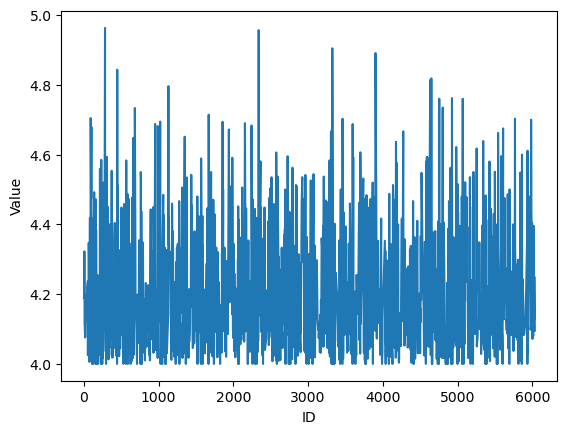

In [13]:
import seaborn as sns

sns.lineplot(data=df, x='ID',y='Value')

<Axes: xlabel='ID', ylabel='count'>

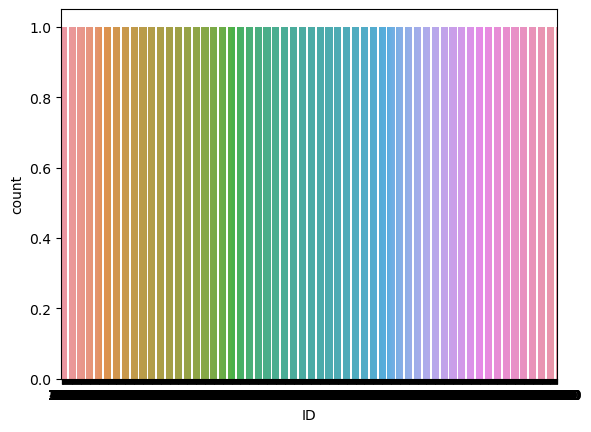

In [18]:
sns.countplot(data=df, x='ID')

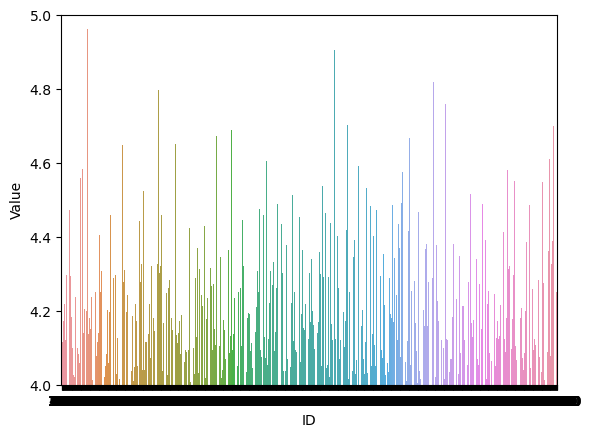

In [21]:
sns.barplot(data=df, x = 'ID', y='Value')
plt.ylim(4.0, 5.0)
plt.show()

<Axes: xlabel='ID', ylabel='Value'>

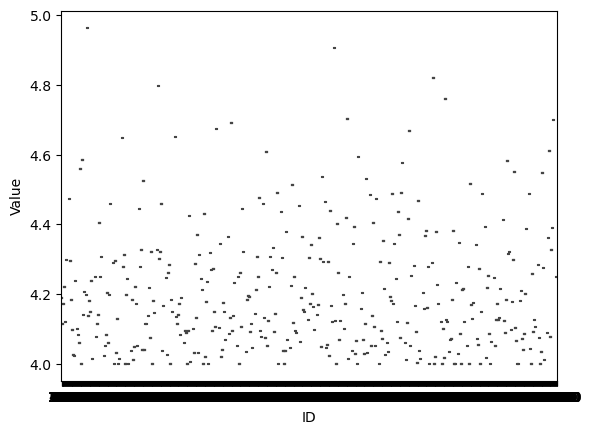

In [22]:
sns.boxplot(data=df, x='ID', y='Value')